In [1]:
import matplotlib.pyplot as plt
import msprime
import numpy as np
from joblib import Parallel, delayed
from validation import compute_ld, plot_compare

In [2]:
SEED = 42
STATS = [
    "r2",
    "r",
    "D",
    "D2",
    "Dz",
    "pi2",
    "D_prime",
    "D2_unbiased",
    "Dz_unbiased",
    "pi2_unbiased",
]

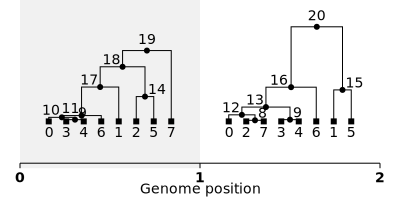

In [3]:
ts = msprime.sim_ancestry(
    population_size=1e4,
    sequence_length=2,
    recombination_rate=1e-3,
    random_seed=SEED,
    samples=4,
)
ts.draw_svg()

In [4]:
L = [t.span for t in ts.trees()]
L2 = np.outer(L, L)

mu = 1e-3
n_reps = 100
stats = compute_ld(ts, STATS, SEED, n_reps=n_reps, mu=mu)

[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   3 out of  10 | elapsed:    0.5s remaining:    1.1s
[Parallel(n_jobs=15)]: Done  10 out of  10 | elapsed:    0.6s finished
[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=15)]: Done  71 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  21 tasks      | elapsed:    0.1s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 con

## TODO: Fix diagonal line!!!

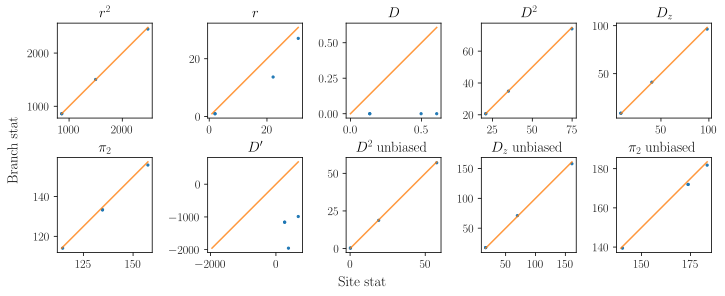

In [5]:
plot_compare(stats, n_reps, L2, mu)

In [6]:
# for s, (site, branch) in stats.items():
#     print(f"=========== {s} ===========")
#     print_compare(site, branch, n_reps, L2, mu)

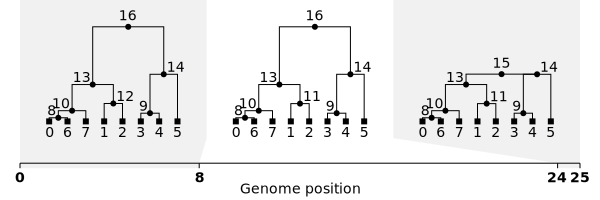

In [7]:
ts = msprime.sim_ancestry(
    population_size=1e4,
    sequence_length=25,
    recombination_rate=5e-7,
    random_seed=SEED,
    samples=4,
)
ts.draw_svg()

In [8]:
L = [t.span for t in ts.trees()]
L2 = np.outer(L, L)

mu = 1e-4
n_reps = 10_000
stats = compute_ld(ts, STATS, SEED, n_reps=n_reps, mu=mu)

[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=15)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=15)]: Done 1250 tasks      | elapsed:    1.6s
[Parallel(n_jobs=15)]: Done 5250 tasks      | elapsed:    5.5s
[Parallel(n_jobs=15)]: Done 9815 tasks      | elapsed:    9.7s
[Parallel(n_jobs=15)]: Done 9971 out of 10000 | elapsed:    9.8s remaining:    0.0s
[Parallel(n_jobs=15)]: Done 10000 out of 10000 | elapsed:    9.8s finished
[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=15)]: Done 1250 tasks      | elapsed:    1.4s
[Parallel(n_jobs=15)]: Done 5250 tasks      | elapsed:    4.7s
[Parallel(n_jobs=15

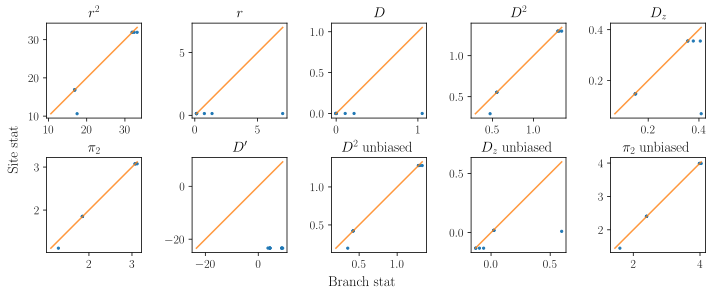

In [9]:
plot_compare(stats, n_reps, L2, mu)

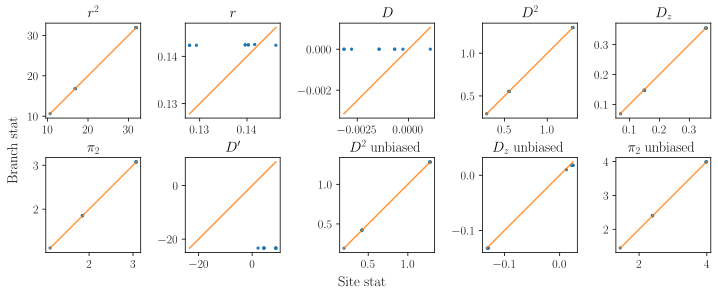

In [9]:
plot_compare(stats, n_reps, L2, mu)

In [21]:
stats['r'][1] * mu ** 2

array([[0.14251208, 0.14242396, 0.14242396],
       [0.14242396, 0.14233749, 0.14233749],
       [0.14242396, 0.14233749, 0.14233749]])

In [22]:
stats['r'][0].sum(0)[0, ...] / L2 / n_reps

array([[0.14162556, 0.1396279 , 0.1402973 ],
       [0.1396279 , 0.1461104 , 0.12786533],
       [0.1402973 , 0.12786533, 0.12930663]])

In [23]:
stats['D_prime'][1] * mu ** 2

array([[-23.37985043, -23.35890045, -23.35890045],
       [-23.35890045, -23.33800238, -23.33800238],
       [-23.35890045, -23.33800238, -23.33800238]])

In [24]:
stats['D_prime'][0].sum(0)[0, ...] / L2 / n_reps

array([[8.85501367, 8.83448086, 4.41069219],
       [8.83448086, 8.81015879, 4.39872109],
       [4.41069219, 4.39872109, 2.1909    ]])

In [10]:
# for s, (site, branch) in stats.items():
#     print(f"=========== {s} ===========")
#     print_compare(site, branch, n_reps, L2, mu)

In [3]:
Ne = 1e4
ts = msprime.sim_ancestry(
    samples=1000,
    # sequence_length=5e4,
    sequence_length=4e4,
    recombination_rate=1e-8,
    population_size=Ne,
    random_seed=SEED,
    discrete_genome=False,
)
ts

In [ ]:
L = [t.span for t in ts.trees()]
L2 = np.outer(L, L)

# mu = 1e-8
mu = 1e-7
n_reps = 50_000
stats = compute_ld(ts, STATS, SEED, n_reps=n_reps, mu=mu)

[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   3 out of  10 | elapsed:  4.3min remaining: 10.0min
[Parallel(n_jobs=15)]: Done  10 out of  10 | elapsed:  5.9min finished
[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    2.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:   12.0s
[Parallel(n_jobs=15)]: Done 420 tasks      | elapsed:   28.6s
[Parallel(n_jobs=15)]: Done 770 tasks      | elapsed:   52.1s
[Parallel(n_jobs=15)]: Done 1220 tasks      | elapsed:  1.4min
[Parallel(n_jobs=15)]: Done 1770 tasks      | elapsed:  2.0min
[Parallel(n_jobs=15)]: Done 2420 tasks      | elapsed:  2.7min
[Parallel(n_jobs=15)]: Done 3170 tasks      | elapsed:  3.6min
[Parallel(n_jobs=15)]: Done 4020 tasks      | elapsed:  4.5min
[Parallel(n_jobs=15)]: Done 4970 tasks      | elapsed:  5.6min
[Parallel(n_jobs=15)]: Done 6020 tasks      | elapsed:  6.7min
[Para

In [ ]:
plot_compare(stats)
plot_compare(stats, n_reps, L2, mu)

In [ ]:
# for s, (site, branch) in stats.items():
#     print(f"=========== {s} ===========")
#     print_compare(site, branch, n_reps, L2, mu)

In [12]:
stats["r2"][0][:, 1, :, :].sum(0)

array([[1.500100e+04, 1.819000e+03, 1.470000e+02, ..., 7.420000e+03,
        5.291800e+04, 1.729100e+04],
       [1.819000e+03, 1.540200e+04, 1.630000e+02, ..., 7.648000e+03,
        5.423400e+04, 1.771300e+04],
       [1.470000e+02, 1.630000e+02, 1.222000e+03, ..., 7.050000e+02,
        4.894000e+03, 1.550000e+03],
       ...,
       [7.420000e+03, 7.648000e+03, 7.050000e+02, ..., 8.844100e+04,
        2.259350e+05, 7.347100e+04],
       [5.291800e+04, 5.423400e+04, 4.894000e+03, ..., 2.259350e+05,
        1.994927e+06, 5.179690e+05],
       [1.729100e+04, 1.771300e+04, 1.550000e+03, ..., 7.347100e+04,
        5.179690e+05, 2.975850e+05]])

In [18]:
(stats["r2"][0][:, 0, :, :] != 0).sum(0)

array([[12455,  1568,   136, ...,  5335, 12243,  9015],
       [ 1568, 12702,   153, ...,  5523, 12507,  9297],
       [  136,   153,  1213, ...,   540,  1185,   877],
       ...,
       [ 5335,  5523,   540, ..., 43312, 42528, 31560],
       [12243, 12507,  1185, ..., 42528, 98215, 71346],
       [ 9015,  9297,   877, ..., 31560, 71346, 72658]])

In [9]:
counts = np.stack(
    [
        [t.num_sites for t in t.trees()]
        for t in gen_mut_sims(ts, seed, 10_000, rate=mu, discrete_genome=False)
    ]
)

In [10]:
counts.sum(0)

array([ 1381,  1366,   123, 10451, 15783,   879,  3496, 10884,  1739,
        1678, 17537, 31026, 17645,  1979,  5655, 34152, 22887,  1693,
        7403, 21704,   185,  9225,  9919, 30428, 17917,  2021, 21214,
         722,  4799, 17339,  9913,  1662,  9099,  2775,  7703,  1177,
       28912, 19788,  5469,  6158,  3573, 19013,  1722,  5948, 14757,
        6597, 14815, 51860,     8,  6106, 11124, 19287,   698, 13580,
          47,  2368, 10584, 34011,  8961, 31404, 16238, 10455,  1152,
        2603,  2892,  9285, 34898, 13919,  2524,  8848, 23602,  8886,
       45561,  6425,  1143, 33962,  1294,  6887,   497,  6066,  3721,
       23804,  1745,  2649,  3211,    28, 16508,  2381,  4308,  9544,
         502, 24802,  4493, 18766,  1951, 12559, 12894,  5186,  3152,
        2450,  5377, 11963, 13239,  1352,  1547,  1113, 16557, 33348,
       26371, 11683,  1097,  8055, 17355, 19272,  7156,  5083,   549,
        8455,  2474, 40299,  1486,  2681, 29826,    16,  4058, 12805,
        3026,  2631,